In [381]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

$$ dx_i = v_i dt$$

$$ dv_i = -\frac{v_i}{T_L}\,dt + \left( \frac{2 v_{rms}^2}{T_L} \right)^{1/2}\,d\xi_i $$

In [382]:

class particle(object):
    '''
    class for numerically integrating trajectories of the 
    stochastic equation of motion in d dimensions. 
    '''
    
    def __init__(self, dt, d=1, vrms=1.0, TL=1.0):
        
        self.dt = dt
        self.vrms = vrms
        self.TL = TL
        self.d = d
        
        self.t = [0.0]
        self.x = [[0.0] for i in range(d)]
        self.v = [[np.random.normal(0, vrms)] for i in range(d)]
        
        
    def step(self):
        
        for i in range(self.d):
            dx = self.v[i][-1] * self.dt
            a = -self.v[i][-1]/self.TL
            b = (2.0*self.vrms**2 / self.TL)**0.5
            dxi = np.random.normal(0, 1.0)*self.dt**0.5
            dv = a*self.dt + b*dxi
            
            self.x[i].append(self.x[i][-1]+dx)
            self.v[i].append(self.v[i][-1]+dv)
        
        self.t.append(self.t[-1] + self.dt)


In [390]:
p = particle(0.1, d=2, TL=1.0, vrms=1.0)

In [391]:
for i in range(50000):
    p.step()


1.0322005904368907


<IPython.core.display.Javascript object>


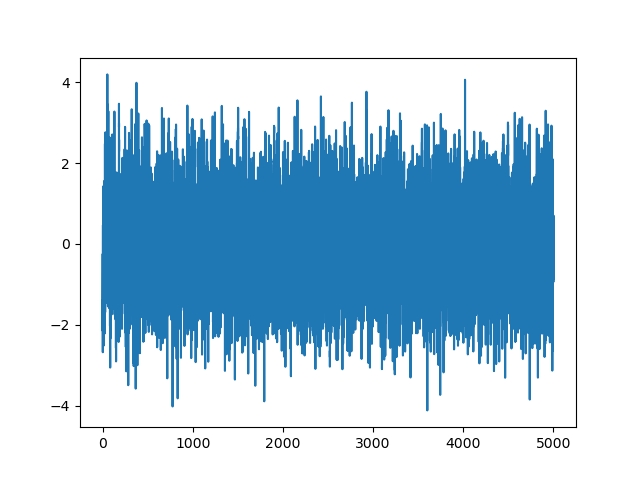

In [392]:
print(np.std(p.v[0])**2)
fig, ax = plt.subplots()
ax.plot(p.t, p.v[0])

<IPython.core.display.Javascript object>


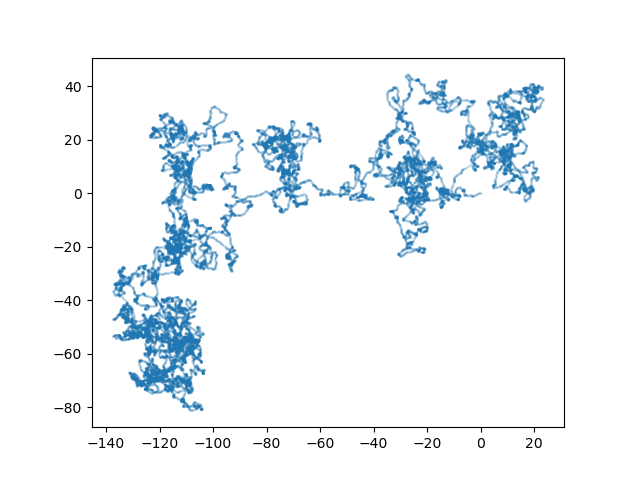

In [396]:
fig, ax = plt.subplots()
ax.plot(p.x[0][:], p.x[1][:], 'o', alpha=.1, ms=1)

ax.set_aspect('equal')

<IPython.core.display.Javascript object>


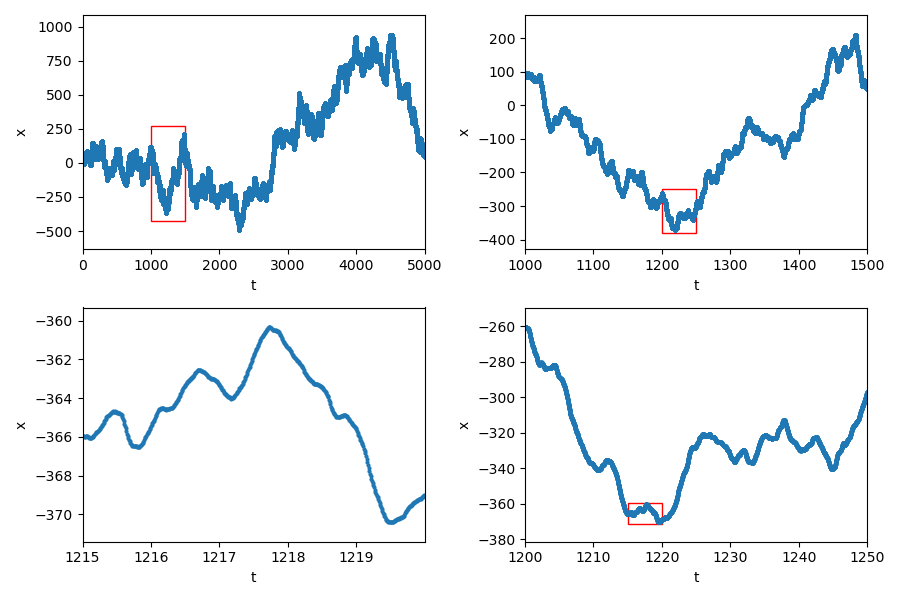

In [220]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(9,6)


t_ranges = [(0,500000), (100000,150000), (120000, 125000), (121500, 122000)]

e_lst = [(0,0), (1,0), (1,1), (0,1)]


e = 0
for i0,i1 in t_ranges:
    j0, j1 = min(p.x[0][i0:i1]), max(p.x[0][i0:i1])
    
    e0, e1 = e_lst[e]
    
    ax[e1][e0].plot(p.t[i0:i1], p.x[0][i0:i1], 'o', ms=2)
    ax[e1][e0].set_xlim(p.t[i0], p.t[i1])
    ax[e1][e0].set_ylim(j0-0.1*(j1-j0), j1+0.1*(j1-j0))
    
    if e<3:
        i0, i1 = t_ranges[e+1]
        j0, j1 = min(p.x[0][i0:i1]), max(p.x[0][i0:i1])
        dj = (j1-j0)*0.1
        m,M = i0/100, i1/100
        ax[e1][e0].add_patch( Rectangle((m,j0-dj), M-m, j1-j0+2*dj, edgecolor = 'r', fill=False ) )
    
    ax[e1][e0].set_xlabel('t')
    ax[e1][e0].set_ylabel('x')
    e+=1
    
plt.tight_layout()

fig.savefig('random_walk_various_scales.jpg')

<IPython.core.display.Javascript object>


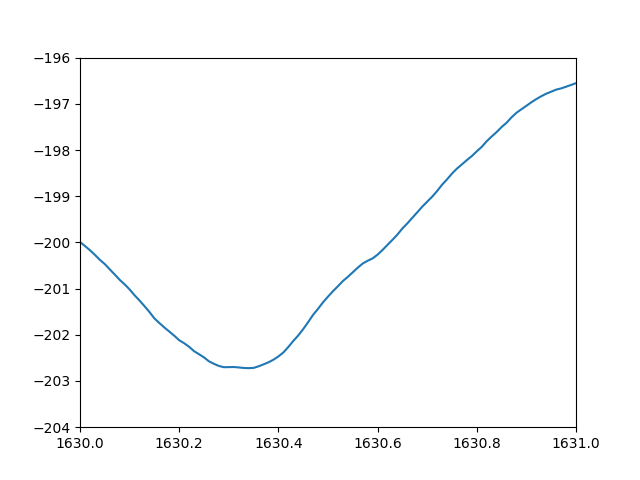

In [263]:
fig, ax = plt.subplots()

ax.plot(p.t, p.x[0])

xlim0 = (0, 5000)
ylim0 = (-550, 1000)

xlim1 = (1630, 1631)
ylim1 = (-204, -196)

dx = xlim1[0]-xlim0[0], xlim1[1]-xlim0[1] 
dy = ylim1[0]-ylim0[0], ylim1[1]-ylim0[1] 




z = 0.001

ii=1
z_lst = np.log(np.linspace(1,np.exp(1),num=10))
for z in z_lst:
    ax.set_xlim(xlim0[0] + dx[0]*z, xlim0[1] + dx[1]*z)
    ax.set_ylim(ylim0[0] + dy[0]*z, ylim0[1] + dy[1]*z)
    fig.savefig('ims/im%.3d.jpg'%(ii))
    ii+=1

### plot several particles trajectories:

In [299]:
N = 30
steps = 200
p_lst = []


mx = 0

for i in range(N):
    p_lst.append(particle(0.01, d=2, TL=5.0))
    for s in range(steps):
        p_lst[-1].step()
    
    

<IPython.core.display.Javascript object>


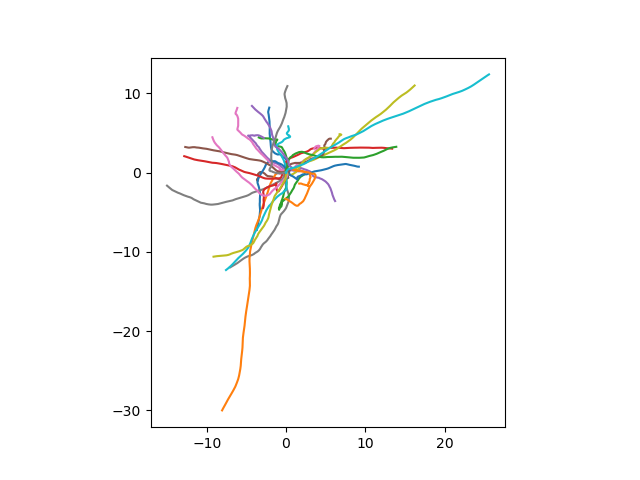

In [300]:
fig, ax = plt.subplots()

for p in p_lst:
    ax.plot(p.x[0], p.x[1])
    
#ax.set_xlim(-20,20)
#ax.set_ylim(-20,20)
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


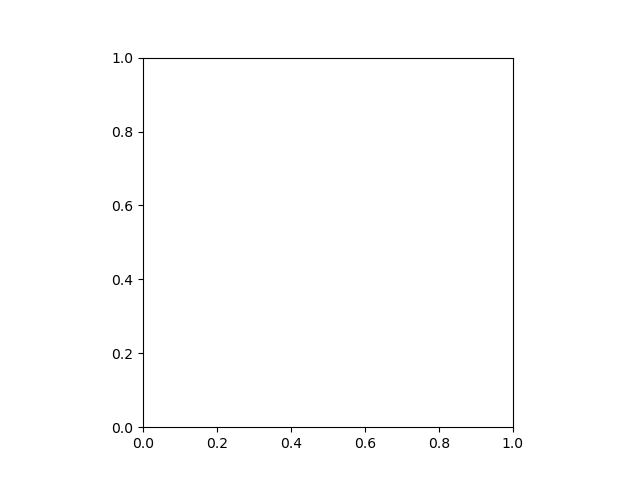

In [301]:
fig, ax = plt.subplots()


for i in range(len(p_lst[0].t))[:]:
    for p in p_lst:
        ax.plot(p.x[0][i], p.x[1][i], 'o', ms=2.5)
        ax.set_xlim(-20,20)
        ax.set_ylim(-20,20)
        ax.set_aspect('equal')
    fig.savefig('ims/im%.3d.jpg'%(i))
    ax.clear()    

In [290]:
250/(1/0.02)

5.0

In [ ]:
AS